<a href="https://colab.research.google.com/github/yashs79/financialaranomaly/blob/main/01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Exploratory Data Analysis (EDA)**

#### Importing libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import plotly.express as px
from sklearn.manifold import TSNE, MDS

np.random.seed(23)

#### **Dataset**

In [ ]:
raw_data = pd.read_csv('/content/creditcard.csv')
df = raw_data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### **1.1 Descriptive Statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,206288.0,72595.411245,35829.428252,0.000000,45013.750000,68517.500000,102662.250000,136151.000000
V1,206288.0,-0.091869,1.903451,-56.407510,-0.957972,-0.071124,1.220939,2.454930
V2,206288.0,-0.000489,1.628956,-72.715728,-0.585124,0.077915,0.782191,22.057729
V3,206288.0,0.283817,1.460169,-33.680984,-0.395688,0.462861,1.204145,9.382558
V4,206288.0,0.067197,1.401268,-5.683171,-0.800431,0.068078,0.872699,16.875344
V5,206288.0,-0.097871,1.364113,-42.147898,-0.774103,-0.156492,0.483921,34.801666
V6,206288.0,0.042320,1.314200,-26.160506,-0.715901,-0.223122,0.441289,22.529298
V7,206288.0,-0.043413,1.219290,-43.557242,-0.573619,-0.004676,0.510513,36.677268
V8,206288.0,0.012762,1.207776,-73.216718,-0.185257,0.040325,0.336284,20.007208
V9,206288.0,0.008342,1.132807,-13.434066,-0.662205,-0.071940,0.623458,15.594995


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206288 entries, 0 to 206287
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    206288 non-null  float64
 1   V1      206288 non-null  float64
 2   V2      206288 non-null  float64
 3   V3      206288 non-null  float64
 4   V4      206288 non-null  float64
 5   V5      206288 non-null  float64
 6   V6      206288 non-null  float64
 7   V7      206288 non-null  float64
 8   V8      206288 non-null  float64
 9   V9      206288 non-null  float64
 10  V10     206288 non-null  float64
 11  V11     206288 non-null  float64
 12  V12     206288 non-null  float64
 13  V13     206288 non-null  float64
 14  V14     206288 non-null  float64
 15  V15     206288 non-null  float64
 16  V16     206288 non-null  float64
 17  V17     206288 non-null  float64
 18  V18     206288 non-null  float64
 19  V19     206288 non-null  float64
 20  V20     206287 non-null  float64
 21  V21     20

#### All input variables are floating point values and the output variable is an integer

#### **1.1.1 Shape of Dataset**

In [ ]:
df.shape

(206288, 31)

#### The dataset contains 284,807 transactions(data points) with 31 columns.
- first 30 columns are the input variables
- last column is the output variable

#### **1.1.2 Checking for missing values**

In [ ]:
df.isna().sum().sum()

11

#### **1.1.3 Summary**
1. There are 284,807 rows(cases) and 31 columns(30 predictor variables and 1 response variable)
2. The first column is `Time`
3. The next 28 columns `V1`, `V2`, ..., `V28` are the Principal Components obtained with PCA on the original features(names not provided due to confidentiality issues.)
4. The last predictor variable(30th column) is `Amount` in the transaction
5. `Time` and `Amount` are the only two features on which PCA is not applied.
6. The last column `class` is the response variable
7. Size of the Dataset = 284,807 data points
8. No. of Input Variables (Features) = 31
9. No. of Output Variables = 1  ( values $\in$ {0,1} )
10. All the predictor variables are floating point values and the response variable is an integer
11. There are no missing values

### **1.2 Univariate and Bivariate Analysis**

In [ ]:
def basic_details(df):
    no_of_obs = df.shape[0]
    types = df.dtypes
    unique_values = df.apply(lambda x: [x.unique()])
    min = df.apply(lambda x: x.min())
    mean = df.apply(lambda x: x.mean())
    std = df.apply(lambda x: x.std())
    max = df.apply(lambda x: x.max())
    nulls = pd.Series(df.isnull().sum())
    distinct_values = df.apply(lambda x: x.unique().shape[0])
    missing_ration = df.apply(lambda x: (x.isnull().sum()/no_of_obs)*100)
    skewness = df.skew()
    kurtosis = df.kurt()
    details_df = pd.concat([types, min, max, std, mean, distinct_values, skewness, kurtosis], axis=1)
    column_names = ['dtype', 'min','max', 'std', 'mean','distinct values','skewness','kurtosis']
    details_df.columns = column_names

    return details_df

In [ ]:
basic_details(df)

,dtype,min,max,std,mean,distinct values,skewness,kurtosis
Time,float64,0.000000,136151.000000,35829.428252,72595.411245,92680,0.188655,-0.894338
V1,float64,-56.407510,2.454930,1.903451,-0.091869,200349,-3.372711,33.087535
V2,float64,-72.715728,22.057729,1.628956,-0.000489,200352,-4.577717,100.721084
V3,float64,-33.680984,9.382558,1.460169,0.283817,200351,-2.997687,36.329315
V4,float64,-5.683171,16.875344,1.401268,0.067197,200349,0.542426,2.480779
V5,float64,-42.147898,34.801666,1.364113,-0.097871,200350,-0.594997,47.560960
V6,float64,-26.160506,22.529298,1.314200,0.042320,200348,1.245522,10.941760
V7,float64,-43.557242,36.677268,1.219290,-0.043413,200349,-1.557897,104.005854
V8,float64,-73.216718,20.007208,1.207776,0.012762,200338,-8.969627,247.334017
V9,float64,-13.434066,15.594995,1.132807,0.008342,200349,0.599924,3.772304


-  As the predictor variables `V1`, `V2`,....`V28` are already transformed using
PCA, it does not make much sense to plot the distributions of these variables and interpret.
- It makes more sense to plot the distributions of the variables `Time`, `Amount` and `Class` and make interpretations.

##### `Time`

### (Q1) Does Fraud transactions occur during a specific time period?

In [ ]:
175000/(60*60)

48.611111111111114

#### The dataset contains sequential transactions that occurred for ~2 days.

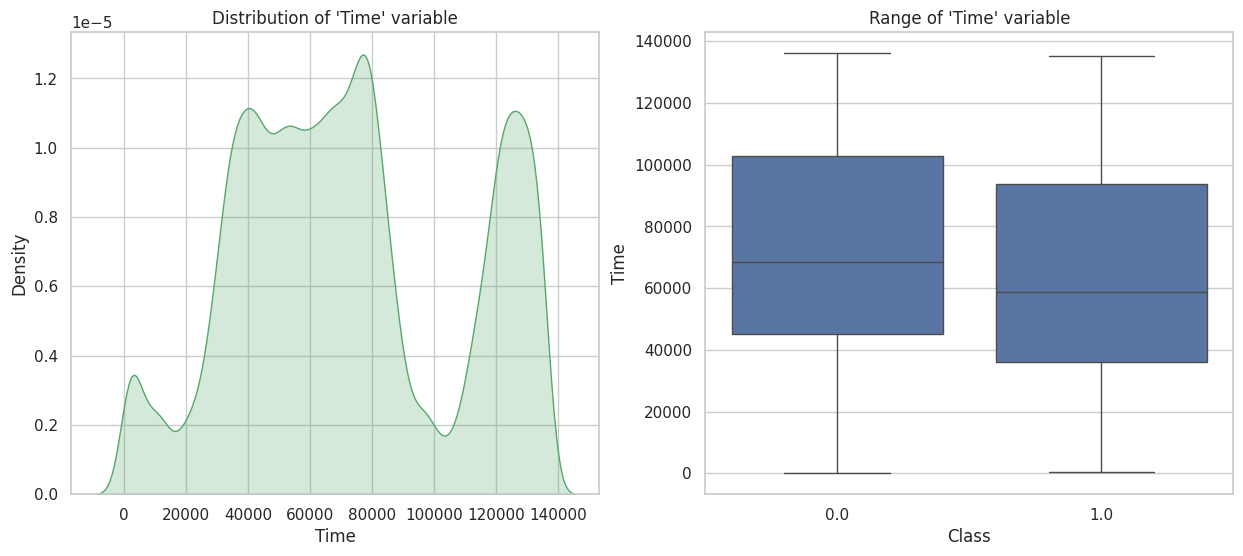

In [ ]:
# sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.kdeplot(data=df, x="Time", color='g',fill=True, ax=axes[0])
sns.boxplot(x="Class", y="Time", data=df)
axes[0].set_title("Distribution of 'Time' variable")
axes[1].set_title("Range of 'Time' variable")
plt.show()

### (A) No, from the box plot, there seems to be no specific time period for fraud transactions. They seem to occur at any time along with normal transactions.

##### `Amount`

### (Q2) Does fraud transactions occur for a specific range of amount?

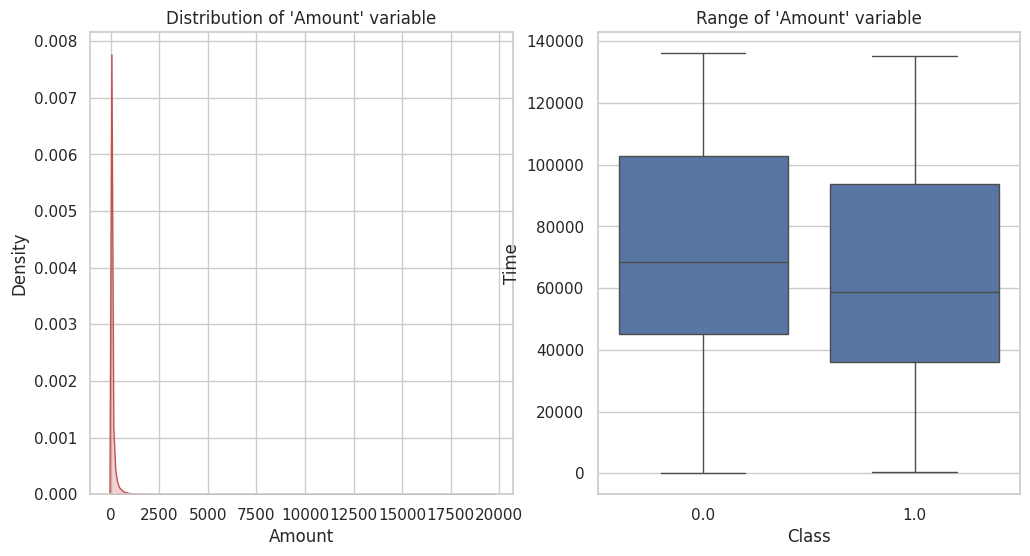

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.kdeplot(data=df, x="Amount", color='r',fill=True, ax=axes[0])
sns.boxplot(x="Class", y="Time", data = df, ax=axes[1])
axes[0].set_title("Distribution of 'Amount' variable")
axes[1].set_title("Range of 'Amount' variable")
plt.show()

### (A) No, from the box plot, we can see that fraud transactions occur for all ranges of amounts similar to those of normal transactions.

##### `Class`

### (Q3) How frequent are the fraud transactions?

<ipython-input-12-8eb9d1540df0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Class", palette="Blues")


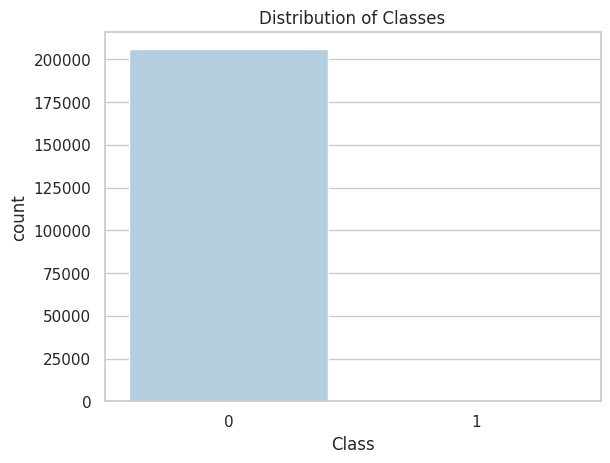

In [ ]:
sns.countplot(data=df, x="Class", palette="Blues")
plt.xticks(np.arange(2), labels=['0', '1'])
plt.title('Distribution of Classes')
plt.show()

In [ ]:
# Checking for class imbalance

vc = df['Class'].value_counts().to_frame().reset_index()
vc['percent'] = vc["Class"].apply(lambda x : round(100*float(x) / len(df), 2))
vc = vc.rename(columns = {"index" : "Target", "Class" : "Count"})
vc

,Count,count,percent
0,0.0,205894,0.0
1,1.0,393,0.0


In [ ]:
284315/492

577.8760162601626

### (A) The ratio of normal transaction to fraud transaction is 578:1 i.e, there seems to one fraud transaction for every 578 normal transactions.
- The dataset contains 284315(99.83%) normal transactions but only 492(0.17%) fraud transactions
- The classes are highly imbalanced. So, `Accuracy` would be a bad performance measure. We should use better performance measures like **Area Under the Precision-Recall Curve (AUPRC).**

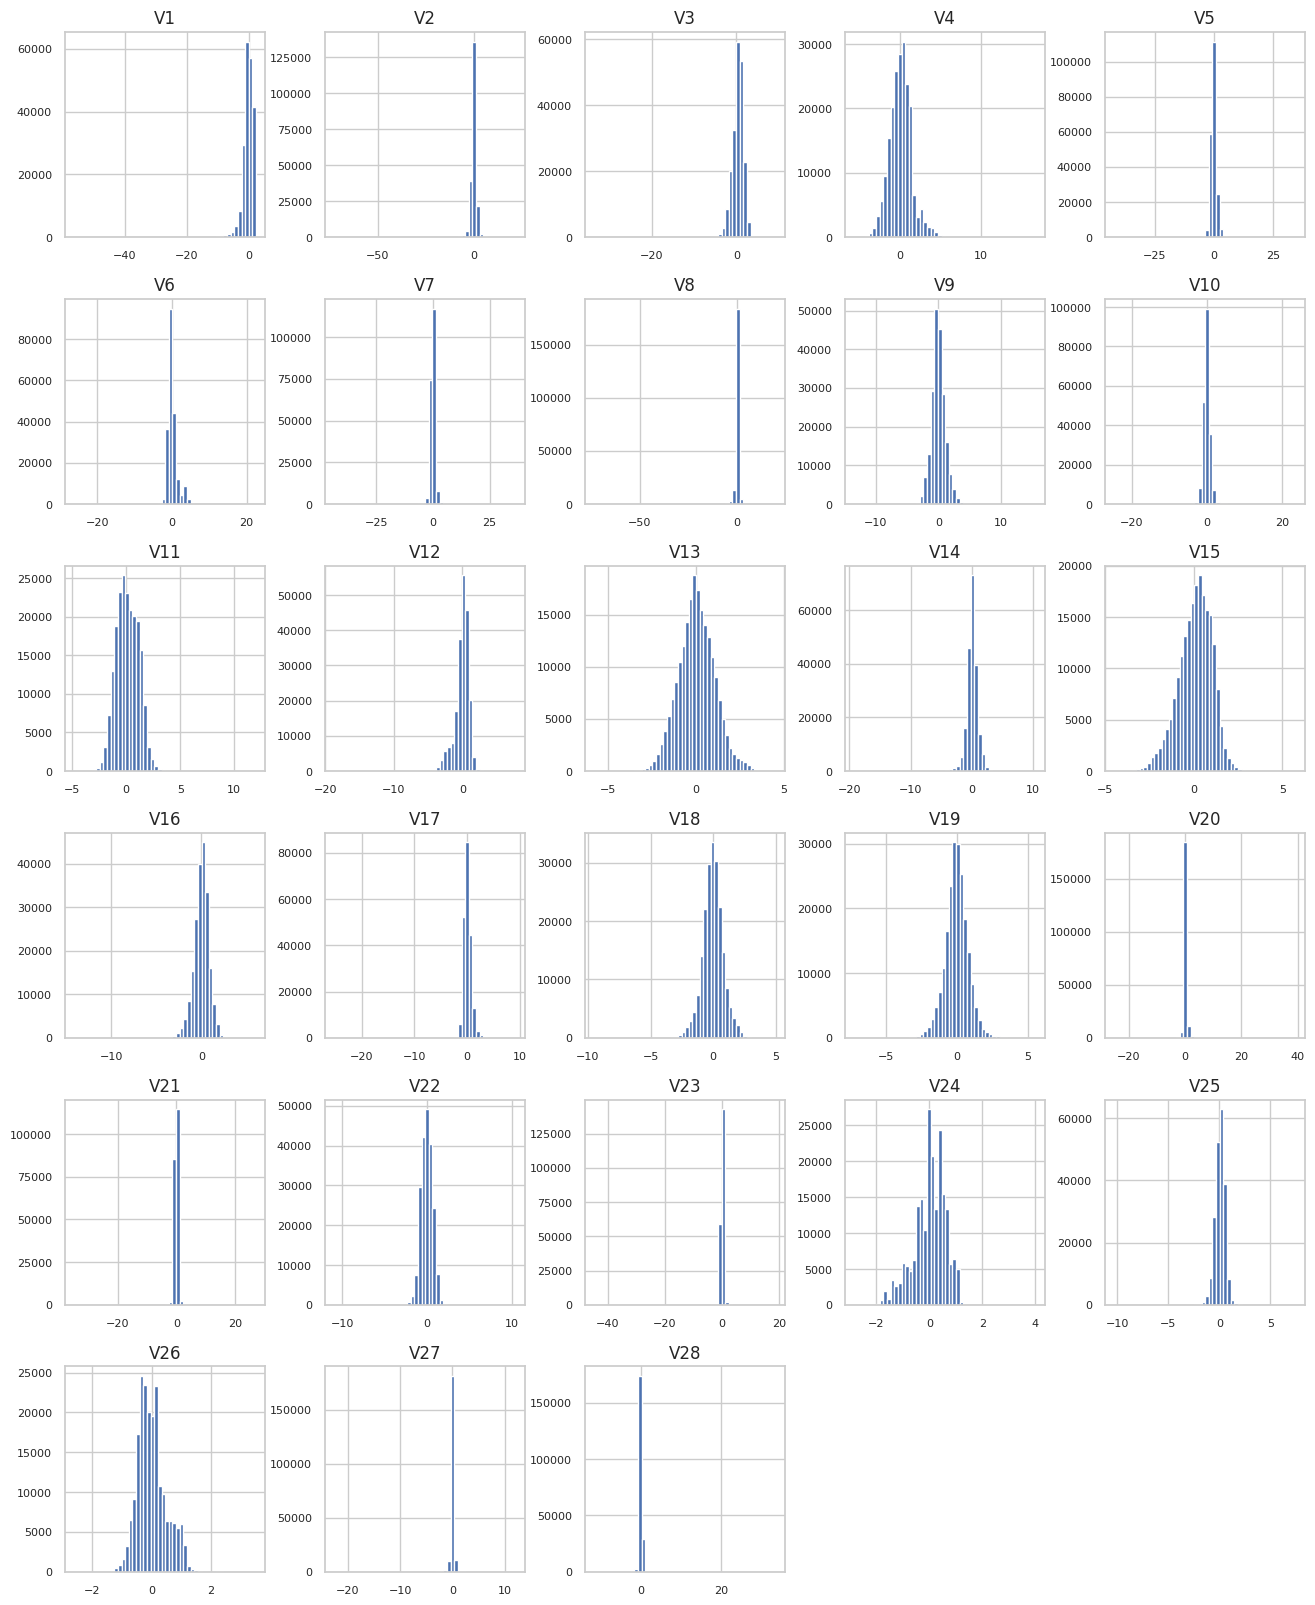

In [ ]:
pca_df = df.copy()
pca_df.drop(labels=['Time', 'Amount', 'Class'], axis=1, inplace= True)
ax = pca_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

**Interpretations:**
From the above distributions we can observe that V1 is right skewed,V4 is slightly left skewed. V11,V13,V15,V18,V19 and V26 are normal.

#### Scatter Plots for each Precitor variable with `Amount`

In [ ]:
# for i in range(df.shape[1]-2):
#     plt.figure(figsize = (10, 6))
#     sns.scatterplot(x=df.iloc[:,i],y=df['Amount'],hue=df['Class'])
#     # sns.scatterplot(x=df.iloc[:,i],y=df['Class'])
#     # sns.scatterplot(x=df.index, y=df.iloc[:,i],hue=df['Class'])
#     plt.show()

**Interpretations:**
From the above bivariate distributions we can observe that V3,V9,V10,V11,V12,V14,V16,V17,V18 all have a clear linear separation among the classes 1 and 0.

### **1.3 Correlation**

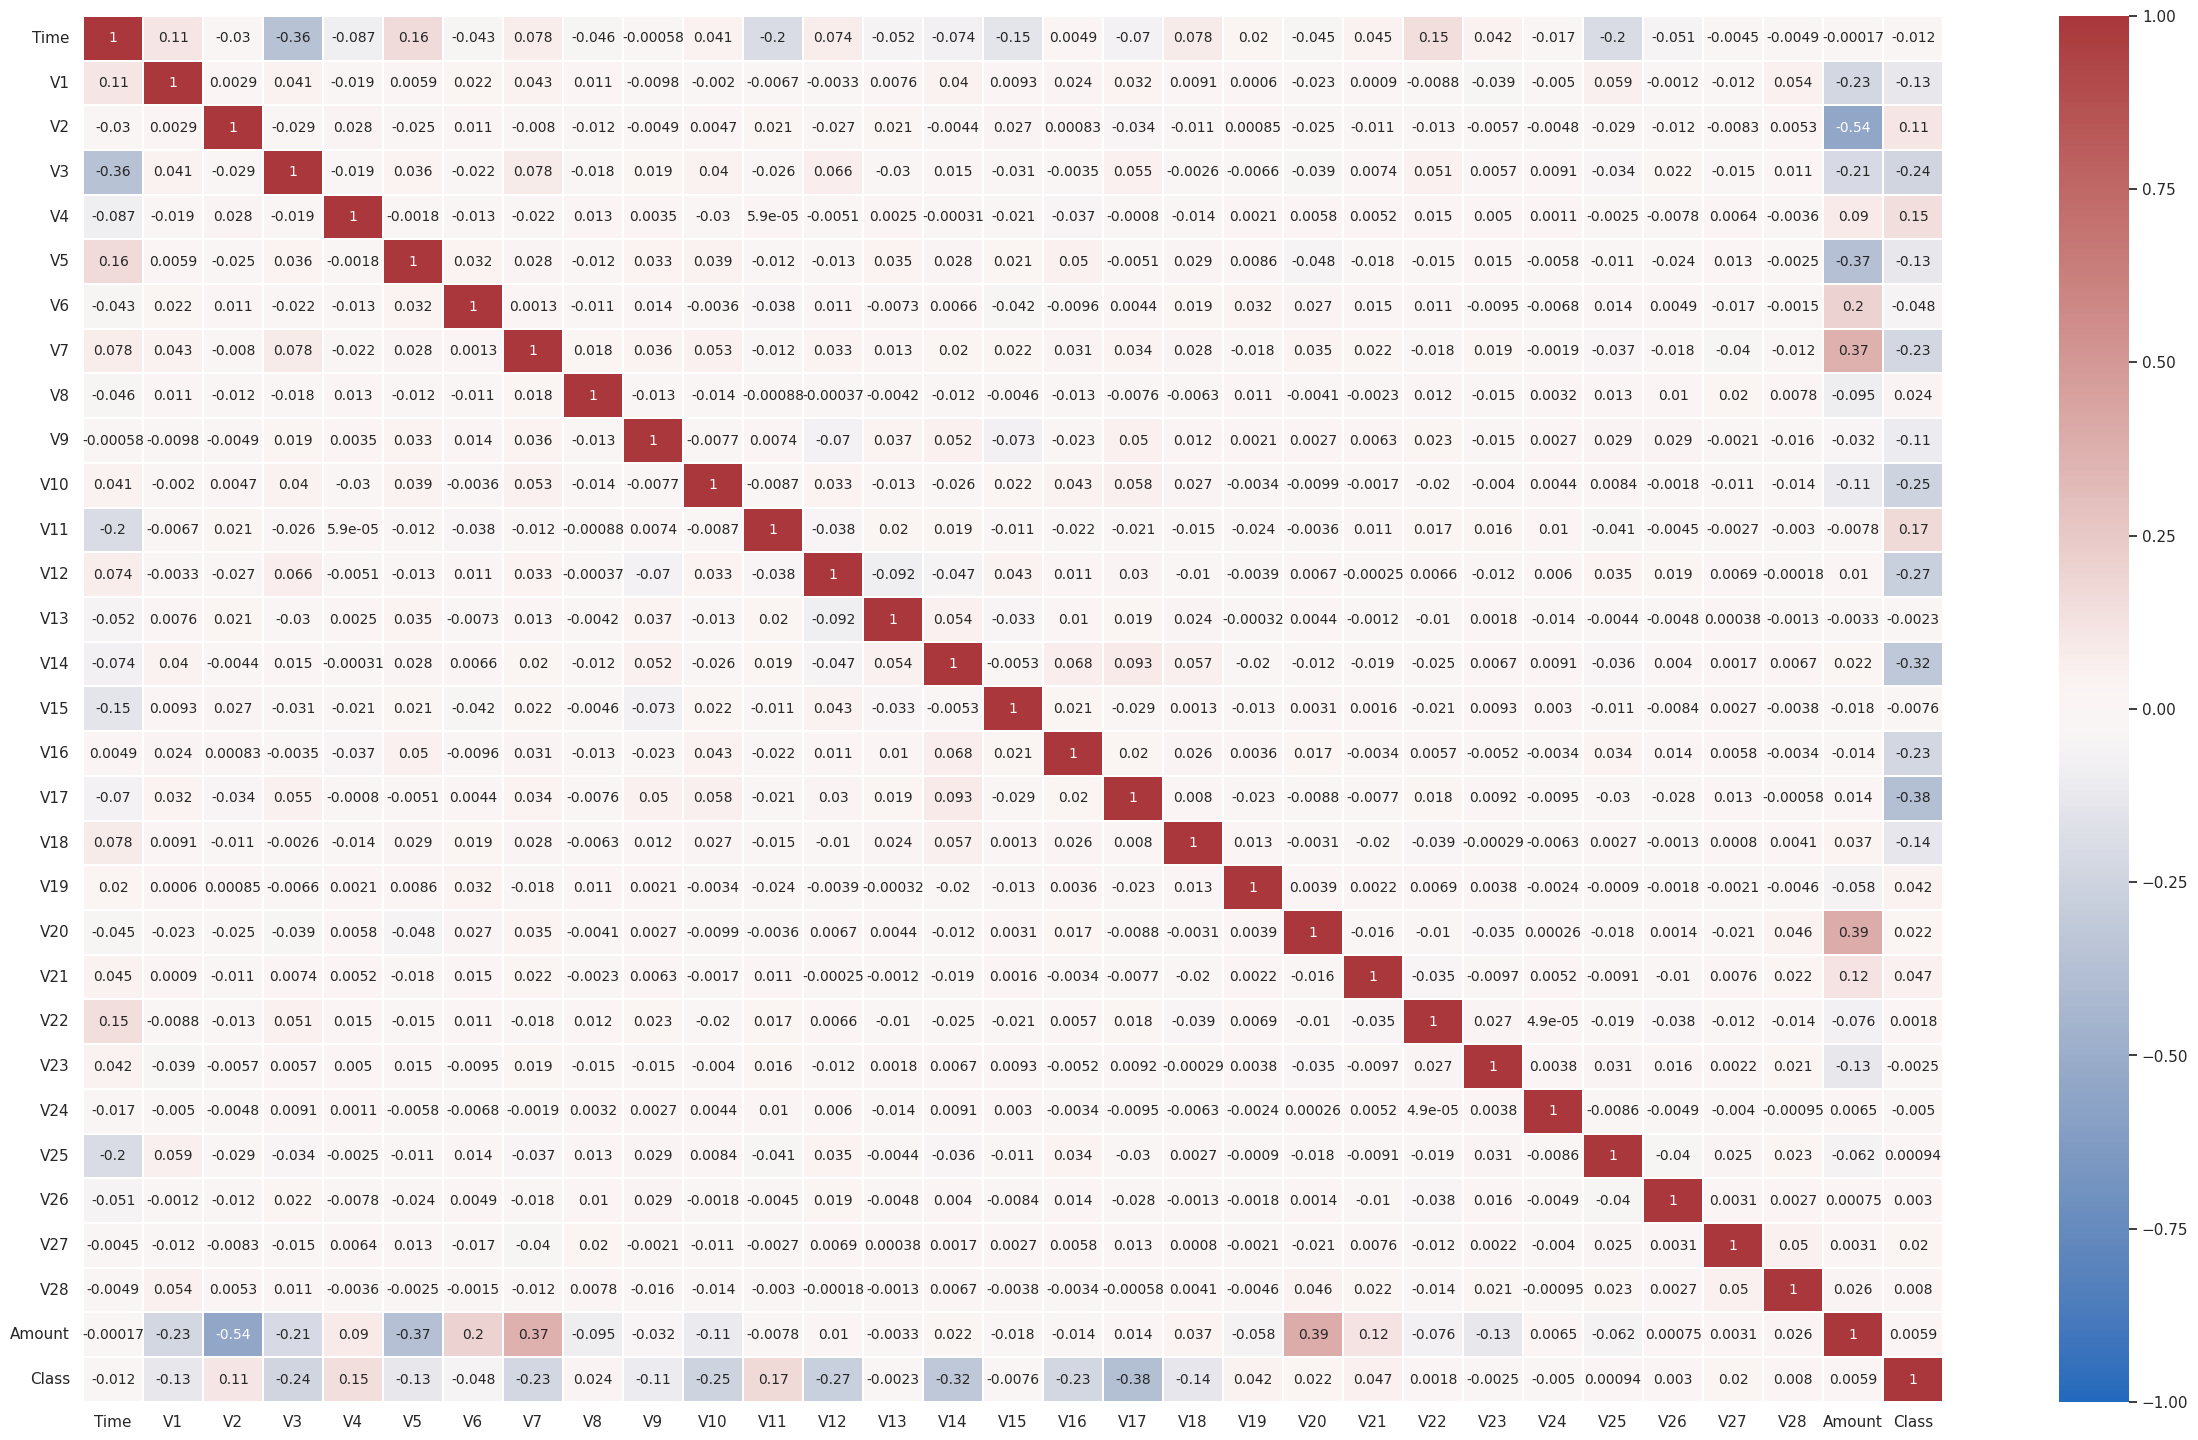

In [ ]:
plt.figure(figsize=(30, 18))
corr  = df.corr()
ax = sns.heatmap(corr,cmap='vlag', vmax=1.0, vmin=-1.0, linewidths=0.1,
                 annot=True, annot_kws={"size":10},square=False)

**Observations:**
1. There seems to be a negative correlation of -0.53 between variables `V2` and `amount`.
2. There seems to be a negative correlation of =0.39 between variables `V5` and `amount`.
3. We observe that there is no correlation between `V1, `V2`,....`V28`. This is expected as they are transformed with PCA

### **1.4 PCA**

#### Computing % of explained variance by each column of {V1,..V28} (i.e, each Principal Component)

In [ ]:
variances = pca_df.var()
total_var = variances.sum()
explained_var = []
cummulative_var = []
sum = 0
for i in list(pca_df.var()):
    var = np.round(i/total_var*100,2)
    explained_var.append( var)
    sum += var
    cummulative_var.append(np.round(sum,2))
pca = pd.DataFrame({'exp_variance(%)': explained_var, 'cum_variance(%)': cummulative_var}, index=list(np.arange(1,29)))
pca

,exp_variance(%),cum_variance(%)
1,11.86,11.86
2,8.68,20.54
3,6.98,27.52
4,6.42,33.94
5,6.09,40.03
6,5.65,45.68
7,4.86,50.54
8,4.77,55.31
9,4.20,59.51
10,3.92,63.43


#### 15 Principal Components explain more than 80% of the variance.

### **1.5 Visualizations**

#### Checking for similarity among normal transactions and fraud transactions

- Sampling 1000 normal transactions and all 492 fraud transactions

In [ ]:
data = raw_data.copy()
data["Time"] = data["Time"].apply(lambda x : x / 3600 % 24)

non_fraud = data[data['Class'] == 0].sample(n=1000, random_state = 23)
fraud = data[data['Class'] == 1]

df = pd.concat([non_fraud, fraud], axis=0).sample(frac=1, random_state = 23).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).to_numpy()
Y = df["Class"].to_numpy()

#### **1.5.1 t-SNE**

**t-SNE** is visualization technique for high-dimensional data
- It finds a way to project data into a low dimensional space(2D or 3D) so that the clustering in the high dimensional space is preserved.
- It retains similarity in data while also revealing important global structure(such as clusters at multiple scales)

#### Projecting dataset into 2-D space using t-SNE

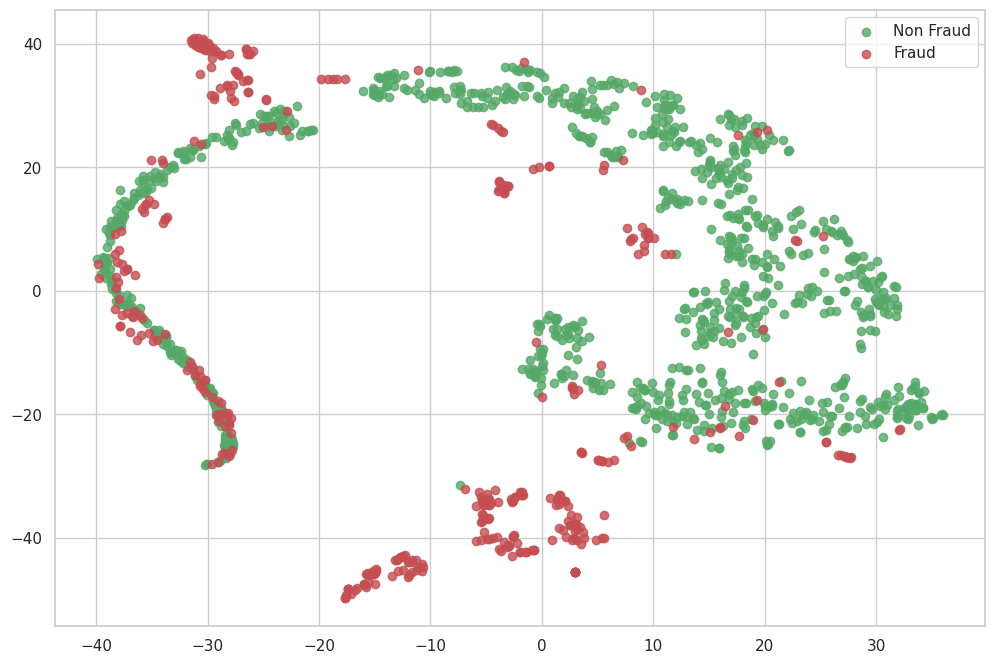

In [ ]:
tsne = TSNE(n_components=2,
            random_state=23,
            n_jobs=-1,
            init = 'random',
            learning_rate='auto')
X_t = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_t[np.where(Y == 0), 0], X_t[np.where(Y == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
plt.scatter(X_t[np.where(Y == 1), 0], X_t[np.where(Y == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')

plt.legend(loc='best')
plt.savefig("tsne_2d.png")
plt.show()

#### Projecting dataset into 3-D space using t-SNE

In [ ]:
tsne_3d = TSNE(n_components=3,
            random_state=23,
            n_jobs=-1,
            init = 'random',
            learning_rate='auto')

X_t_3d = tsne_3d.fit_transform(X)

X_t_3d_df = pd.DataFrame(data = X_t_3d,columns = ['T1','T2','T3'])
X_t_3d_df['Class'] = Y

fig = px.scatter_3d(X_t_3d_df, x='T1', y= 'T2', z='T3',  color='Class')
fig.show()

#### **1.5.2 Multi-dimensional Scaling (MDS)**

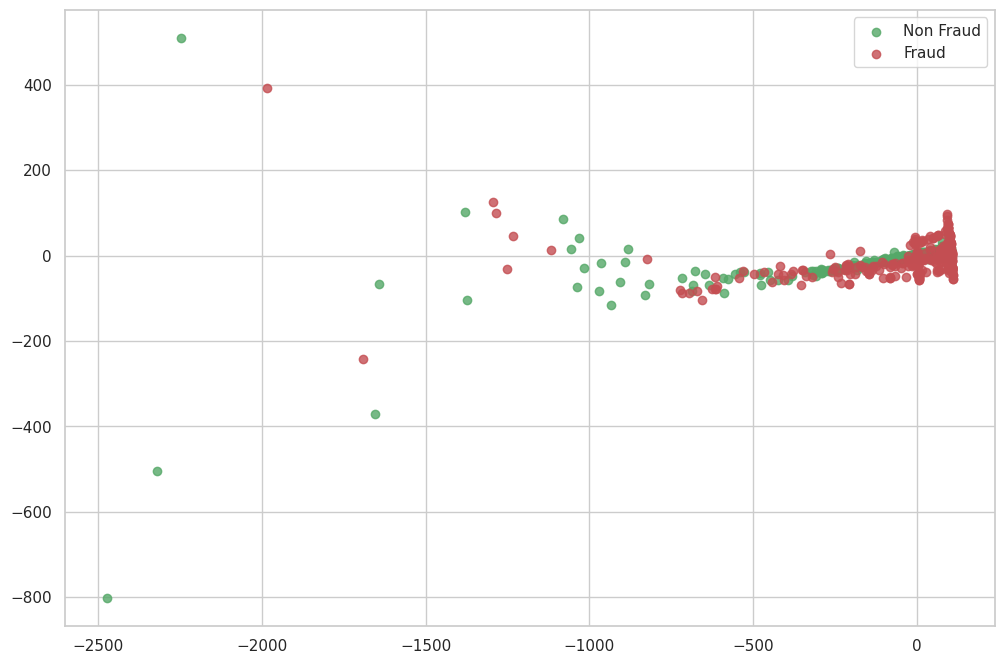

In [ ]:
mds = MDS(n_components=2, random_state=23, n_jobs=-1)
X_t = mds.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_t[np.where(Y == 0), 0], X_t[np.where(Y == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
plt.scatter(X_t[np.where(Y == 1), 0], X_t[np.where(Y == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')

plt.legend(loc='best')
plt.savefig("MDS_2d.png")
plt.show()

In [ ]:
mds_3d = MDS(n_components=3, random_state=23, n_jobs=-1)
X_t_3d = mds_3d.fit_transform(X)

X_t_3d_df = pd.DataFrame(data = X_t_3d,columns = ['T1','T2','T3'])
X_t_3d_df['Class'] = Y

fig = px.scatter_3d(X_t_3d_df, x='T1', y= 'T2', z='T3',  color='Class')
fig.show()

**Conclusions:**
1. t-SNE plots reveal some level of clustering and similarity among normal transactions and fraudlent transactions.